__Hoja de trabajo Proyecto BMW - Esther__

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1.Importar dataset

In [236]:
df_bmw = pd.read_csv('dataset/bmw_pricing_v3.csv')

In [237]:
df_bmw.sample(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2136,BMW,116,12580.0,85.0,NaN,diesel,silver,hatchback,False,NaN,False,NaN,False,False,True,False,9200.0,2018-05-01
1561,BMW,520,193438.0,120.0,2014-01-01,diesel,grey,estate,True,True,False,NaN,True,False,True,True,16400.0,2018-07-01
2634,BMW,520,107714.0,140.0,NaN,diesel,black,sedan,False,True,False,False,True,False,True,False,16800.0,2018-02-01
3285,BMW,520,177762.0,135.0,NaN,diesel,black,NaN,True,True,False,NaN,True,True,True,True,18400.0,2018-06-01
975,BMW,M550,145348.0,280.0,2014-07-01,diesel,blue,estate,False,True,False,NaN,True,True,True,True,37100.0,2018-04-01


In [238]:
df_bmw.shape

(4843, 18)

In [239]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

Primeros comentarios:
1. Varias columnas con nulos
2. Campos fechas tipo 'object'
3. Solo el campo 'gps' es tipo booleano, en cambio campos como volante_regulable, aire_acondicionado, camara_trasera...alerta_lim_velocidad son 'objects' a pesar de tener valores 'True/False' 

In [240]:
#cambio las fechas a date_time
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i]=pd.to_datetime(df_bmw[i])

In [241]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

2. Análisis duplicados

In [242]:
df_bmw[df_bmw.duplicated()].shape

(0, 18)

Comentarios: sin duplicados

3. Análisis nulos

In [243]:
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1. Analizamos los campos con más nulos

3.1.1. MARCA: vemos que solo tiene dos valores 'BMW' y 'nan'. Por lo tanto como no aporta información, la borramos (haciendo una copia antes)


In [244]:
df_bmw['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [245]:
df_bmw1 =  df_bmw.copy()

In [246]:
del(df_bmw1['marca'])

In [247]:
df_bmw1.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [248]:
df_bmw1.shape

(4843, 17)

3.1.2 FECHA REGISTO: columna con demasiados nulos. La eliminamos.

In [249]:
df_bmw1['fecha_registro'].value_counts(dropna = False, normalize = True) * 100

fecha_registro
NaT           50.030973
2013-07-01     1.920297
2014-03-01     1.713814
2014-05-01     1.672517
2013-01-01     1.610572
                ...    
2007-01-01     0.020648
1990-03-01     0.020648
2006-11-01     0.020648
1994-01-01     0.020648
2005-09-01     0.020648
Name: proportion, Length: 181, dtype: float64

In [250]:
df_bmw2 =  df_bmw1.copy()

In [251]:
df_bmw2.shape

(4843, 17)

In [252]:
del(df_bmw2['fecha_registro'])

In [253]:
df_bmw2.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1.3 COLOR: Muchos nulos, pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin color'

In [254]:
df_bmw2['color'].value_counts(dropna = False, normalize = True) * 100

color
black     30.951889
grey      22.093744
blue      13.359488
white      9.993805
NaN        9.188520
brown      6.235804
silver     6.029321
red        0.970473
beige      0.763989
green      0.289077
orange     0.123890
Name: proportion, dtype: float64

In [255]:
df_bmw2[df_bmw2['color'].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,120,174631.0,120.0,diesel,NaN,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,325,205474.0,145.0,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
25,318,196092.0,85.0,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
47,420,20996.0,135.0,petrol,NaN,coupe,True,False,False,NaN,True,False,True,False,21400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,X4,61989.0,140.0,diesel,NaN,NaN,False,False,False,NaN,False,NaN,False,True,28600.0,2018-09-01
4777,X5,285669.0,173.0,diesel,NaN,NaN,True,True,False,NaN,True,False,True,True,9300.0,2018-09-01
4805,218 Active Tourer,35382.0,110.0,diesel,NaN,van,False,NaN,False,NaN,False,NaN,True,True,13100.0,2018-02-01
4818,X3,110039.0,130.0,diesel,NaN,NaN,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01


In [256]:
df_bmw3 = df_bmw2.copy()

In [257]:
df_bmw3['color'].fillna('sin color', inplace=True)

In [258]:
df_bmw3.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                             0
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

3.1.4 TIPO_COCHE: Muchos nulos, pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin tipo_coche'

In [259]:
df_bmw3['tipo_coche'].value_counts(dropna = False, normalize = True) * 100

tipo_coche
NaN            30.146603
estate         22.857733
sedan          16.952302
suv            15.589511
hatchback      10.076399
subcompact      1.589924
coupe           1.569275
convertible     0.619451
van             0.598802
Name: proportion, dtype: float64

In [260]:
df_bmw3['tipo_coche'].fillna('sin tipo_coche', inplace=True)

3.1.5 AIRE_ACONDICIONADO: Varios nulos, pero no creo que se deba borrar la columna por contener información relevante. Les asigno el valor 'sin info aire_acondicionado'

In [261]:
df_bmw3['aire_acondicionado'].value_counts(dropna = False, normalize = True) * 100

aire_acondicionado
True     71.546562
False    18.418336
NaN      10.035102
Name: proportion, dtype: float64

In [262]:
df_bmw3['aire_acondicionado'].fillna('sin info aire_acondicionado', inplace=True)

3.1.6 ASIENTOS_PLEGABLES: Columna no relevante con muchos nulos. La elimino.

In [263]:
df_bmw3['asientos_traseros_plegables'].value_counts(dropna = False, normalize = True) * 100

asientos_traseros_plegables
NaN      70.018584
False    23.745612
True      6.235804
Name: proportion, dtype: float64

In [264]:
df_bmw4 = df_bmw3.copy()

In [265]:
del(df_bmw4['asientos_traseros_plegables'])

3.1.7 BLUETOOTH: Columna no relevante con muchos nulos. La elimino.

In [266]:
df_bmw4['bluetooth'].value_counts(dropna = False, normalize = True) * 100

bluetooth
False    64.402230
True     20.565765
NaN      15.032005
Name: proportion, dtype: float64

In [267]:
del(df_bmw4['bluetooth'])

3.1.8 ALERTA_LIM_VELOCIDAD: Columna no relevante con muchos nulos. La elimino.

In [268]:
df_bmw4['alerta_lim_velocidad'].value_counts(dropna = False, normalize = True) * 100

alerta_lim_velocidad
True     46.252323
False    38.715672
NaN      15.032005
Name: proportion, dtype: float64

In [269]:
del(df_bmw4['alerta_lim_velocidad'])

In [270]:
df_bmw4.isnull().sum()

modelo                  3
km                      2
potencia                1
tipo_gasolina           5
color                   0
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
gps                     0
precio                  6
fecha_venta             1
dtype: int64

In [271]:
df_bmw4.isnull().shape

(4843, 13)

3.2 Analizamos las categorías con muy pocos nulos: modelo, km, potencia, tipo_gasolina, volante_regulable, camara_trasera, elevalunas_electrico, precio, fecha_venta

In [272]:
col_few_nulls = ['modelo', 'km', 'potencia', 'tipo_gasolina', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'precio', 'fecha_venta']

In [273]:
num_rows_nulls = len(df_bmw4[df_bmw4['modelo'].isnull() | df_bmw4['km'].isnull() | df_bmw4['tipo_gasolina'].isnull() | df_bmw4['volante_regulable'].isnull() | df_bmw4['camara_trasera'].isnull() | df_bmw4['elevalunas_electrico'].isnull() | df_bmw4['precio'].isnull() | df_bmw4['fecha_venta'].isnull()]) 
print(num_rows_nulls)
print(num_rows_nulls / df_bmw4.shape[0] * 100)

25
0.5162089613875697


In [274]:
df_num_rows_nulls = df_bmw4[df_bmw4['modelo'].isnull() | df_bmw4['km'].isnull() | df_bmw4['tipo_gasolina'].isnull() | df_bmw4['volante_regulable'].isnull() | df_bmw4['camara_trasera'].isnull() | df_bmw4['elevalunas_electrico'].isnull() | df_bmw4['precio'].isnull() | df_bmw4['fecha_venta'].isnull()] 
df_num_rows_nulls

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,gps,precio,fecha_venta
63,640,69695.0,230.0,diesel,sin color,coupe,True,True,False,NaN,True,36300.0,2018-02-01
66,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,True,True,11900.0,2018-06-01
82,420,54993.0,135.0,NaN,black,sin tipo_coche,False,False,False,False,False,18400.0,2018-03-01
117,420,174740.0,135.0,diesel,sin color,coupe,True,True,True,True,True,NaN,2018-05-01
173,NaN,146338.0,105.0,diesel,black,sin tipo_coche,False,True,False,False,True,13300.0,2018-08-01
185,320,186697.0,135.0,NaN,white,estate,False,False,False,False,False,2400.0,2018-04-01
273,318,195032.0,100.0,diesel,grey,sin tipo_coche,NaN,sin info aire_acondicionado,False,False,True,4900.0,2018-01-01
291,520,163675.0,135.0,diesel,sin color,estate,True,True,NaN,True,True,14900.0,2018-01-01
305,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,True,28800.0,2018-01-01
409,316,160619.0,85.0,diesel,black,estate,False,True,NaN,True,True,11700.0,2018-04-01


Al ser tan pocas filas las que tienen alguno de estos campos a nulo, las elimino

In [275]:
df_bmw5 = df_bmw4.copy()
df_bmw5.shape

(4843, 13)

In [276]:
df_bmw5.dropna(subset = col_few_nulls, inplace=True)
df_bmw5.shape

(4817, 13)

In [277]:
df_bmw5.reset_index(drop=True, inplace=True)

In [278]:
df_bmw5.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
gps                     0
precio                  0
fecha_venta             0
dtype: int64

4. Análisis univariable

In [279]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4817 non-null   object        
 1   km                    4817 non-null   float64       
 2   potencia              4817 non-null   float64       
 3   tipo_gasolina         4817 non-null   object        
 4   color                 4817 non-null   object        
 5   tipo_coche            4817 non-null   object        
 6   volante_regulable     4817 non-null   object        
 7   aire_acondicionado    4817 non-null   object        
 8   camara_trasera        4817 non-null   object        
 9   elevalunas_electrico  4817 non-null   object        
 10  gps                   4817 non-null   bool          
 11  precio                4817 non-null   float64       
 12  fecha_venta           4817 non-null   datetime64[ns]
dtypes: bool(1), dateti

In [280]:
for i in df_bmw5:
    print('\n',i,df_bmw5[i].unique(),'\n')


 modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 


 km [140411.  13929. 183297. ...  19633.  27920. 195840.] 


 potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210. 122. 200.  90.
 150. 141. 173. 137. 280. 112. 189.  

Vamos a crear columnas de las varibles con valores True/False al tipo entero para que las considere boolenas:

In [281]:
col_booleans = ['volante_regulable', 'camara_trasera', 'elevalunas_electrico', 'gps']

for i in col_booleans:
    df_bmw5[i+'_BOOL'] = df_bmw5[i].astype(int)

In [282]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   modelo                     4817 non-null   object        
 1   km                         4817 non-null   float64       
 2   potencia                   4817 non-null   float64       
 3   tipo_gasolina              4817 non-null   object        
 4   color                      4817 non-null   object        
 5   tipo_coche                 4817 non-null   object        
 6   volante_regulable          4817 non-null   object        
 7   aire_acondicionado         4817 non-null   object        
 8   camara_trasera             4817 non-null   object        
 9   elevalunas_electrico       4817 non-null   object        
 10  gps                        4817 non-null   bool          
 11  precio                     4817 non-null   float64       
 12  fecha_

In [283]:
df_bmw6 = df_bmw5.copy()

In [284]:
for i in col_booleans:
    del(df_bmw6[i])

In [285]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   modelo                     4817 non-null   object        
 1   km                         4817 non-null   float64       
 2   potencia                   4817 non-null   float64       
 3   tipo_gasolina              4817 non-null   object        
 4   color                      4817 non-null   object        
 5   tipo_coche                 4817 non-null   object        
 6   aire_acondicionado         4817 non-null   object        
 7   precio                     4817 non-null   float64       
 8   fecha_venta                4817 non-null   datetime64[ns]
 9   volante_regulable_BOOL     4817 non-null   int32         
 10  camara_trasera_BOOL        4817 non-null   int32         
 11  elevalunas_electrico_BOOL  4817 non-null   int32         
 12  gps_BO

In [286]:
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [287]:
lnum, lbool, lcat= obtener_lista_variables(df_bmw6)

In [288]:
print(len(df_bmw6.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lcat), "variables categóricas")
print(len(lbool), "variables boolean")
print(len(lnum), "variables numéricas")

13 total de variables
1 variable a predecir
5 variables categóricas
4 variables boolean
2 variables numéricas


4.1. Analizar las variables numéricas

In [ ]:
lnum

In [ ]:
df_bmw6[['km','potencia']].describe()

[[<Axes: title={'center': 'km'}>]]


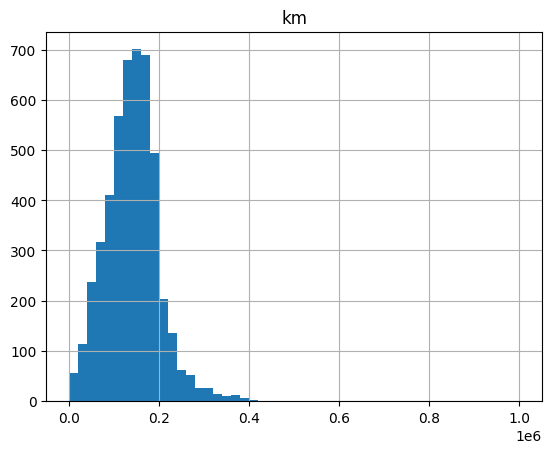

In [334]:
print(df_bmw6.hist('km', bins = 50))

In [300]:
df_bmw6['km'].describe()

count    4.817000e+03
mean     1.409353e+05
std      6.024268e+04
min     -6.400000e+01
25%      1.027580e+05
50%      1.409910e+05
75%      1.752350e+05
max      1.000376e+06
Name: km, dtype: float64

Observamos que el valor mínimo de 'km' es < 0 y que hay outliers más allá del 0.5e6

In [329]:
df_bmw6[(df_bmw6['km'] > 0.4e+06) | (df_bmw6['km'] < 0)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,aire_acondicionado,precio,fecha_venta,volante_regulable_BOOL,camara_trasera_BOOL,elevalunas_electrico_BOOL,gps_BOOL
539,520,484615.0,120.0,diesel,blue,estate,True,8300.0,2018-03-01,1,0,0,1
1550,320,400654.0,110.0,diesel,black,estate,False,1800.0,2018-07-01,0,1,0,1
2327,318,477571.0,85.0,diesel,grey,sin tipo_coche,True,1200.0,2018-07-01,0,0,0,0
2806,525,439060.0,105.0,diesel,silver,sin tipo_coche,False,100.0,2018-03-01,0,1,0,1
2915,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,75000.0,2018-04-01,1,0,0,1
3175,320,405816.0,100.0,diesel,blue,sedan,False,500.0,2018-05-01,0,0,0,1
3709,118,1000376.0,90.0,diesel,sin color,sin tipo_coche,False,1400.0,2018-06-01,1,0,0,1


In [330]:
df_bmw7 = df_bmw6.copy()

In [336]:
df_bmw7[(df_bmw7['km'] > 0.4e+06) | (df_bmw7['km'] < 0)].index

Index([539, 1550, 2327, 2806, 2915, 3175, 3709], dtype='int64')

In [337]:
len(df_bmw7)

4817

In [339]:
df_bmw7.drop(df_bmw7[(df_bmw7['km'] > 0.4e+06) | (df_bmw7['km'] < 0)].index, inplace=True)

In [340]:
len(df_bmw7)

4810

[[<Axes: title={'center': 'km'}>]]


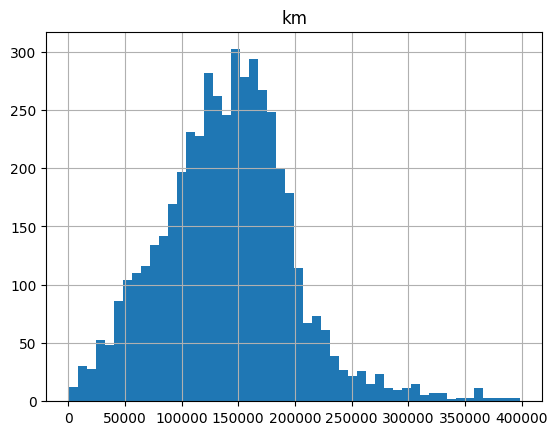

In [341]:
print(df_bmw7.hist('km', bins = 50))

4.2. Analizar las variables categóricas (SIN ACABAR)

In [289]:
lcat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'aire_acondicionado']

In [290]:
for i in lcat:
    print(df_bmw6[i].value_counts(), '\n')

modelo
320                747
520                630
318                562
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64 

tipo_gasolina
diesel           4610
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64 

color
black        1489
grey         1067
blue          643
white         480
sin color     442
brown         302
silver        290
red            47
beige          37
green          14
orange          6
Name: count, dtype: int64 

tipo_coche
sin tipo_coche    1449
estate            1097
sedan              821
suv                754
hatchback          488
subcompact          77
coupe               73
convertible         30
van                 28
Name: count, dtype: int64 

aire_acondicionado
True                           3449
False          